In [12]:
import datetime
# import talib
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import requests
import os
import sys
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import math
import _pickle as cPickle
sys.path.insert(0, '../model_structure')
def get_device():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

data_path = '../extraction/eb_target/bert_token_WMT.pkl'
csv_path = "DCNN_Final_more2.csv"
model_path = '../models/model.pt'
model_path_last = '_last.pt'.join(model_path.split('.pt'))

config = {
    'learning_rate': 0.001,
    'weight_decay': 1e-7,
    'batch_size': 32,
    'n_epochs': 100,
}


device = get_device()
print(torch.cuda.is_available())
# print(torch.cuda.get_device_name(0))
# # Prepare Dataset
class EssayDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        if y is not None:
            self.y = y
        else:
            self.y = None

        self.n_samples = X.shape[0]

    def __getitem__(self, index):
        # if self.y is not None:
        return self.X[index], self.y[index]

        # else:
        #     return self.a0[index], self.p[index], self.a1[index]

    def __len__(self):
        return self.n_samples

def same_seeds(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
# T
with open(csv_path, "w") as f:
    f.write(f'ticker,channels,train_acc,val_acc,test_acc,size\n')
def normalize(x):
    return ((x - x.min()) / (
            x.max() - x.min()))  # .values


def stationary(x):
    return (x / x.shift(1) - 1)




with open(rf"../embeddings/transformer/y.pickle", "rb") as input_file:
    y = cPickle.load(input_file)
y_df = y
encoding = {}
elements = {
    "leo":0,
    "aries":0,
    "sagittarius":0,
    "cancer":1,
    "scorpio":1,
    "pisces": 1,
    "gemini":2,
    "libra": 2,
    "aquarius":2,
    "taurus": 3,
    "virgo": 3,
    "capricorn": 3
}
for i in range(len(y.unique())):
    encoding[y.unique()[i]] = i
def label_encode(x):
    # return math.sqrt(x)
    return encoding[x]
def element_encode(x):
    # return math.sqrt(x)
    return elements[x]
y = np.array(list(map(label_encode, y_df)))


False


total: 48890, train: 39112, val: 4889, test: 4889
[001/100] Train Acc: 0.087876 Loss: 2.486601 | Val Acc: 0.088362 loss: 2.485264
saving model with acc 0.088


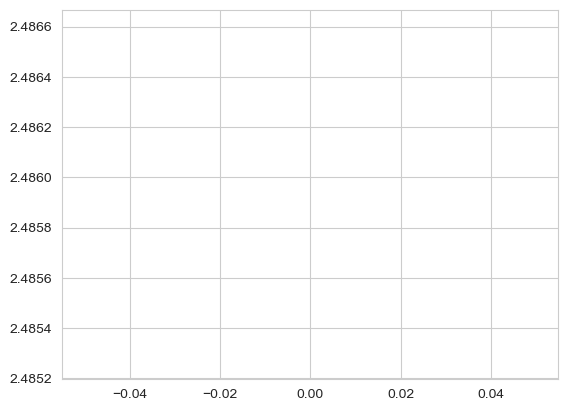

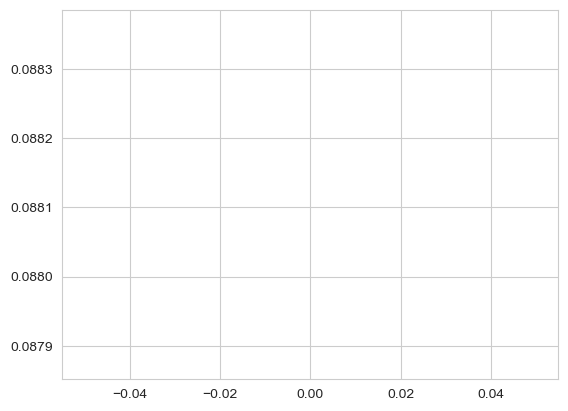

[002/100] Train Acc: 0.093092 Loss: 2.481722 | Val Acc: 0.088771 loss: 2.486287
saving model with acc 0.089
[003/100] Train Acc: 0.100839 Loss: 2.477034 | Val Acc: 0.083657 loss: 2.487451
[004/100] Train Acc: 0.107588 Loss: 2.471235 | Val Acc: 0.087748 loss: 2.489698
[005/100] Train Acc: 0.111807 Loss: 2.465724 | Val Acc: 0.089589 loss: 2.492465
saving model with acc 0.090
[006/100] Train Acc: 0.116486 Loss: 2.460394 | Val Acc: 0.089180 loss: 2.495789
[007/100] Train Acc: 0.119196 Loss: 2.455508 | Val Acc: 0.091225 loss: 2.498825
saving model with acc 0.091
[008/100] Train Acc: 0.122264 Loss: 2.451401 | Val Acc: 0.091634 loss: 2.503435
saving model with acc 0.092
[009/100] Train Acc: 0.123159 Loss: 2.447341 | Val Acc: 0.089180 loss: 2.507230
[010/100] Train Acc: 0.124207 Loss: 2.443760 | Val Acc: 0.088771 loss: 2.510547
[011/100] Train Acc: 0.125895 Loss: 2.440587 | Val Acc: 0.091225 loss: 2.512679


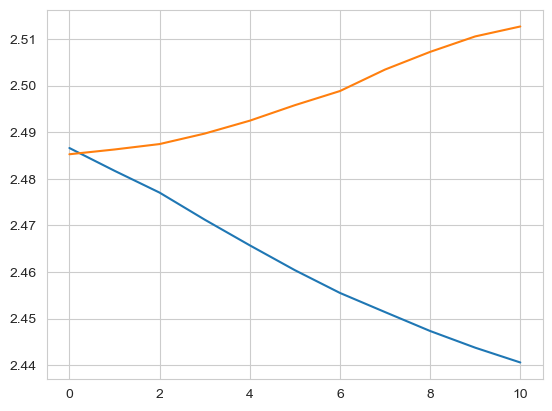

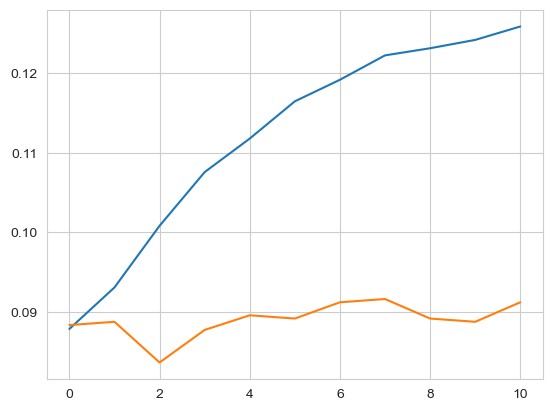

[012/100] Train Acc: 0.126866 Loss: 2.437731 | Val Acc: 0.089180 loss: 2.515295
[013/100] Train Acc: 0.128068 Loss: 2.435012 | Val Acc: 0.091021 loss: 2.517875
[014/100] Train Acc: 0.128247 Loss: 2.431840 | Val Acc: 0.091021 loss: 2.521478
[015/100] Train Acc: 0.129602 Loss: 2.429202 | Val Acc: 0.092862 loss: 2.523940
saving model with acc 0.093
[016/100] Train Acc: 0.131238 Loss: 2.426714 | Val Acc: 0.093884 loss: 2.526984
saving model with acc 0.094
[017/100] Train Acc: 0.133105 Loss: 2.424381 | Val Acc: 0.091225 loss: 2.529386
[018/100] Train Acc: 0.133156 Loss: 2.422039 | Val Acc: 0.090202 loss: 2.531747
[019/100] Train Acc: 0.134255 Loss: 2.419866 | Val Acc: 0.091430 loss: 2.535602
[020/100] Train Acc: 0.136045 Loss: 2.417889 | Val Acc: 0.089793 loss: 2.536490
[021/100] Train Acc: 0.136480 Loss: 2.416071 | Val Acc: 0.088771 loss: 2.539683


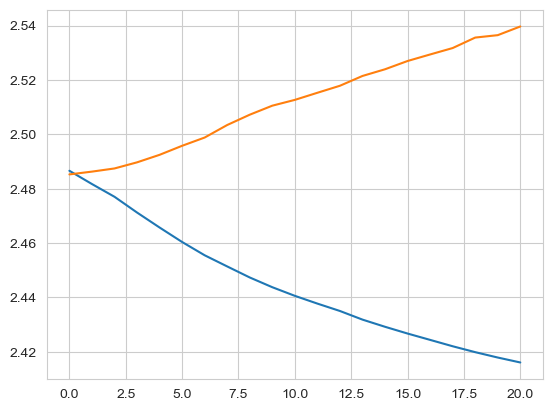

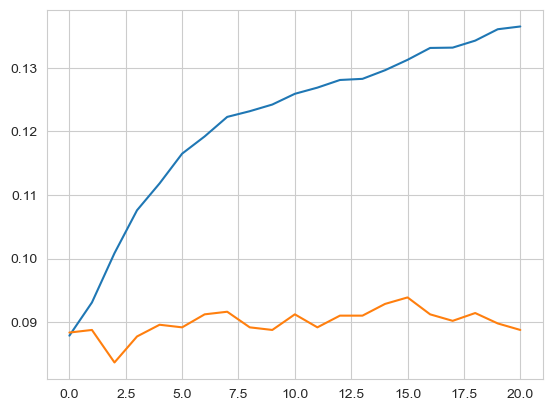

[022/100] Train Acc: 0.137349 Loss: 2.414056 | Val Acc: 0.087339 loss: 2.542418
[023/100] Train Acc: 0.138576 Loss: 2.412474 | Val Acc: 0.088566 loss: 2.543282
[024/100] Train Acc: 0.138525 Loss: 2.411072 | Val Acc: 0.090202 loss: 2.545405
[025/100] Train Acc: 0.140264 Loss: 2.409489 | Val Acc: 0.088975 loss: 2.548052
[026/100] Train Acc: 0.140264 Loss: 2.408045 | Val Acc: 0.089589 loss: 2.549535
[027/100] Train Acc: 0.141184 Loss: 2.406569 | Val Acc: 0.088566 loss: 2.550850
[028/100] Train Acc: 0.141466 Loss: 2.405328 | Val Acc: 0.089180 loss: 2.552429
[029/100] Train Acc: 0.141593 Loss: 2.403932 | Val Acc: 0.089384 loss: 2.554301
[030/100] Train Acc: 0.143051 Loss: 2.402314 | Val Acc: 0.087953 loss: 2.558208
[031/100] Train Acc: 0.144304 Loss: 2.400954 | Val Acc: 0.089180 loss: 2.558620


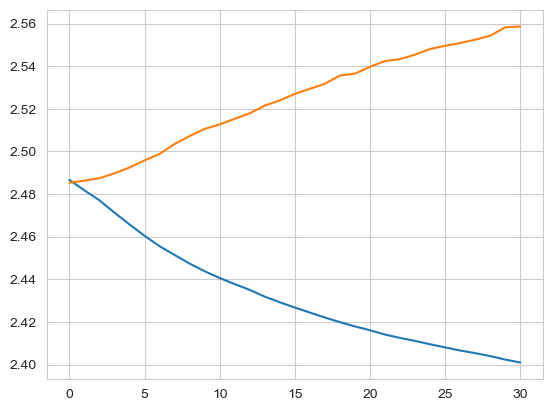

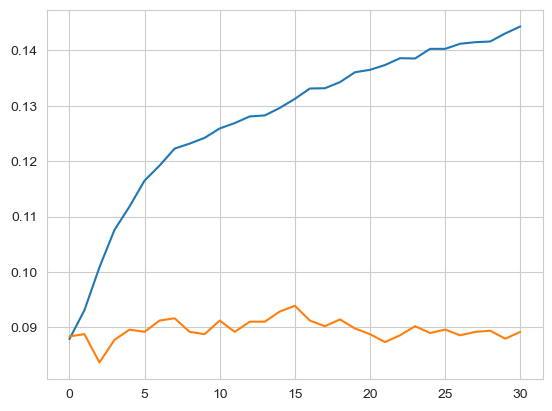

[032/100] Train Acc: 0.144585 Loss: 2.399594 | Val Acc: 0.089998 loss: 2.561259
[033/100] Train Acc: 0.145377 Loss: 2.398315 | Val Acc: 0.088771 loss: 2.561872
[034/100] Train Acc: 0.146042 Loss: 2.397100 | Val Acc: 0.088566 loss: 2.564165
[035/100] Train Acc: 0.147014 Loss: 2.395891 | Val Acc: 0.088975 loss: 2.566483
[036/100] Train Acc: 0.146988 Loss: 2.394306 | Val Acc: 0.089998 loss: 2.568740
[037/100] Train Acc: 0.147448 Loss: 2.393194 | Val Acc: 0.089384 loss: 2.570559
[038/100] Train Acc: 0.147704 Loss: 2.392321 | Val Acc: 0.087543 loss: 2.572260
[039/100] Train Acc: 0.147653 Loss: 2.391146 | Val Acc: 0.087543 loss: 2.575684
[040/100] Train Acc: 0.147678 Loss: 2.390001 | Val Acc: 0.087748 loss: 2.577647
[041/100] Train Acc: 0.149391 Loss: 2.388655 | Val Acc: 0.087748 loss: 2.578779


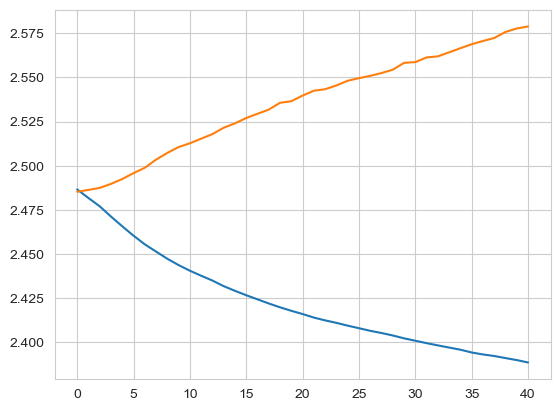

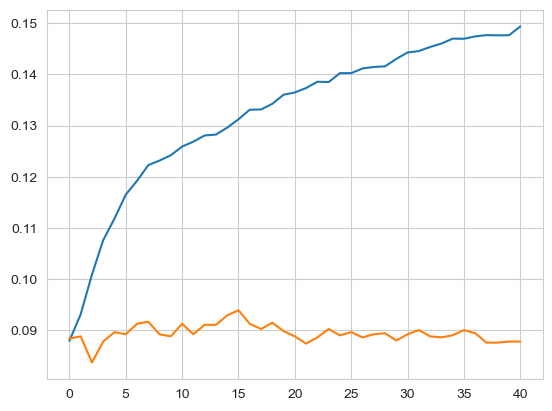

[042/100] Train Acc: 0.148829 Loss: 2.387546 | Val Acc: 0.088157 loss: 2.581274
[043/100] Train Acc: 0.148497 Loss: 2.386508 | Val Acc: 0.087748 loss: 2.582344
[044/100] Train Acc: 0.148318 Loss: 2.385455 | Val Acc: 0.088566 loss: 2.585140
[045/100] Train Acc: 0.149187 Loss: 2.384339 | Val Acc: 0.086930 loss: 2.586333
[046/100] Train Acc: 0.149519 Loss: 2.383558 | Val Acc: 0.087339 loss: 2.590344
[047/100] Train Acc: 0.149928 Loss: 2.382332 | Val Acc: 0.087543 loss: 2.592553
[048/100] Train Acc: 0.150568 Loss: 2.381476 | Val Acc: 0.087748 loss: 2.595609
[049/100] Train Acc: 0.149980 Loss: 2.380579 | Val Acc: 0.086725 loss: 2.596201
[050/100] Train Acc: 0.150516 Loss: 2.379449 | Val Acc: 0.087748 loss: 2.599748
[051/100] Train Acc: 0.150823 Loss: 2.378495 | Val Acc: 0.088157 loss: 2.600331


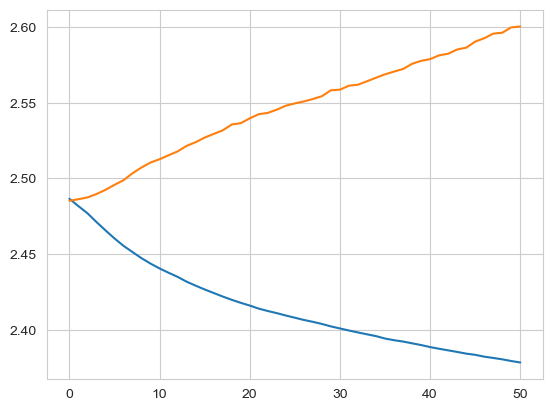

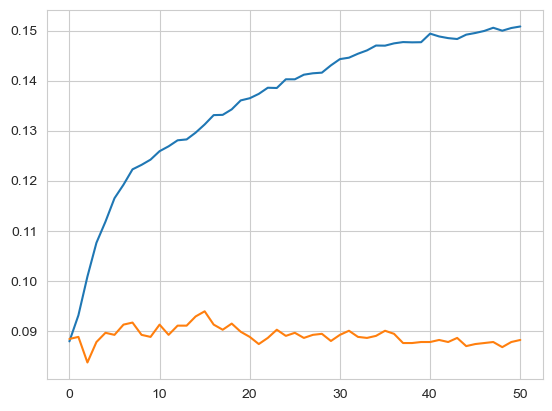

[052/100] Train Acc: 0.150568 Loss: 2.377819 | Val Acc: 0.086316 loss: 2.603272
[053/100] Train Acc: 0.150542 Loss: 2.376947 | Val Acc: 0.087339 loss: 2.608092
[054/100] Train Acc: 0.150593 Loss: 2.376377 | Val Acc: 0.085498 loss: 2.609315
[055/100] Train Acc: 0.151283 Loss: 2.375162 | Val Acc: 0.085703 loss: 2.609305
[056/100] Train Acc: 0.151769 Loss: 2.374350 | Val Acc: 0.087134 loss: 2.613611
[057/100] Train Acc: 0.151974 Loss: 2.373475 | Val Acc: 0.085294 loss: 2.613284
[058/100] Train Acc: 0.152025 Loss: 2.372815 | Val Acc: 0.084884 loss: 2.615619
[059/100] Train Acc: 0.151565 Loss: 2.372049 | Val Acc: 0.085089 loss: 2.618695
[060/100] Train Acc: 0.152894 Loss: 2.371453 | Val Acc: 0.085294 loss: 2.620615
[061/100] Train Acc: 0.151641 Loss: 2.370472 | Val Acc: 0.085294 loss: 2.621426


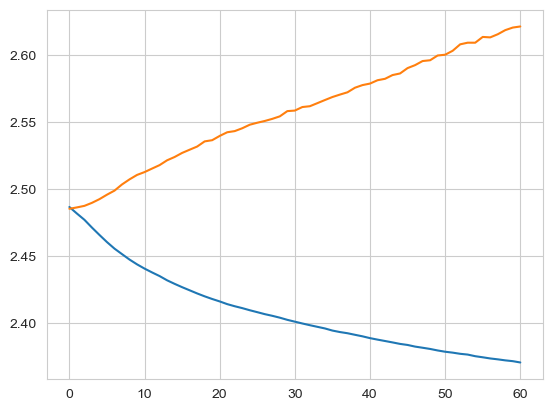

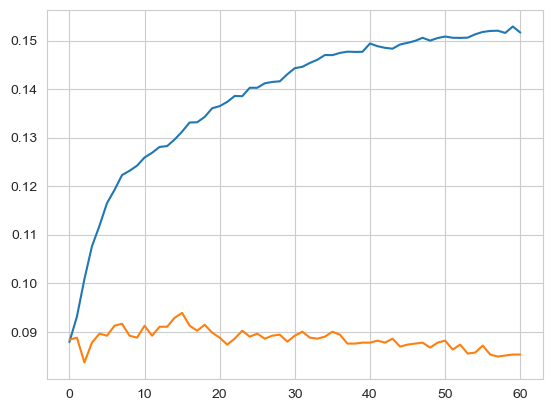

[062/100] Train Acc: 0.152587 Loss: 2.369945 | Val Acc: 0.086316 loss: 2.620784
[063/100] Train Acc: 0.152715 Loss: 2.368978 | Val Acc: 0.085498 loss: 2.622261
[064/100] Train Acc: 0.153380 Loss: 2.368420 | Val Acc: 0.085089 loss: 2.627047
[065/100] Train Acc: 0.153508 Loss: 2.367300 | Val Acc: 0.085294 loss: 2.627113
[066/100] Train Acc: 0.153866 Loss: 2.367132 | Val Acc: 0.084680 loss: 2.630918
[067/100] Train Acc: 0.154121 Loss: 2.366099 | Val Acc: 0.084884 loss: 2.631124
[068/100] Train Acc: 0.154454 Loss: 2.365622 | Val Acc: 0.083862 loss: 2.633958
[069/100] Train Acc: 0.154045 Loss: 2.365096 | Val Acc: 0.087339 loss: 2.637742
[070/100] Train Acc: 0.154147 Loss: 2.364660 | Val Acc: 0.084884 loss: 2.638128
[071/100] Train Acc: 0.154403 Loss: 2.363490 | Val Acc: 0.086316 loss: 2.640266


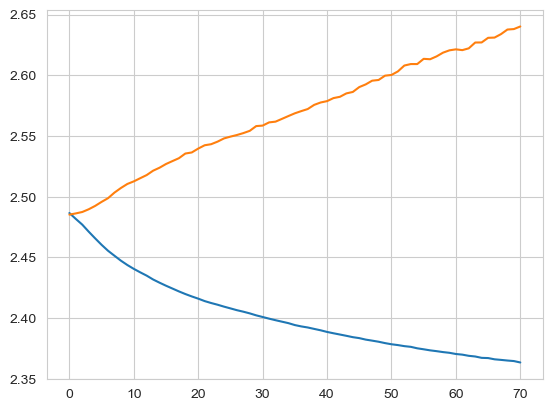

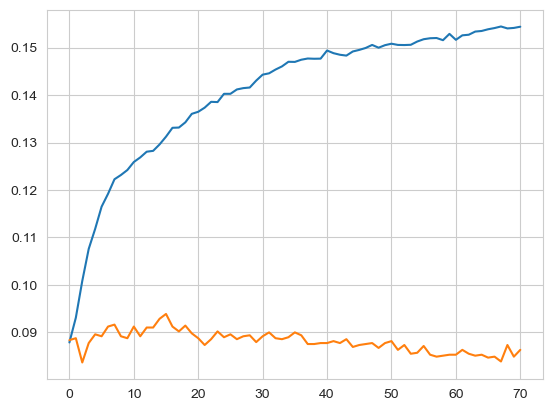

[072/100] Train Acc: 0.154863 Loss: 2.362949 | Val Acc: 0.085294 loss: 2.642507
[073/100] Train Acc: 0.154454 Loss: 2.362523 | Val Acc: 0.085498 loss: 2.643959
[074/100] Train Acc: 0.154684 Loss: 2.361578 | Val Acc: 0.085294 loss: 2.648732
[075/100] Train Acc: 0.154454 Loss: 2.361399 | Val Acc: 0.086112 loss: 2.649072
[076/100] Train Acc: 0.155298 Loss: 2.360860 | Val Acc: 0.085089 loss: 2.655117
[077/100] Train Acc: 0.155195 Loss: 2.359856 | Val Acc: 0.086521 loss: 2.658248
[078/100] Train Acc: 0.156039 Loss: 2.359602 | Val Acc: 0.083862 loss: 2.659899
[079/100] Train Acc: 0.155758 Loss: 2.358491 | Val Acc: 0.083862 loss: 2.662560
[080/100] Train Acc: 0.156474 Loss: 2.358325 | Val Acc: 0.085703 loss: 2.663842
[081/100] Train Acc: 0.156065 Loss: 2.358081 | Val Acc: 0.085089 loss: 2.667297


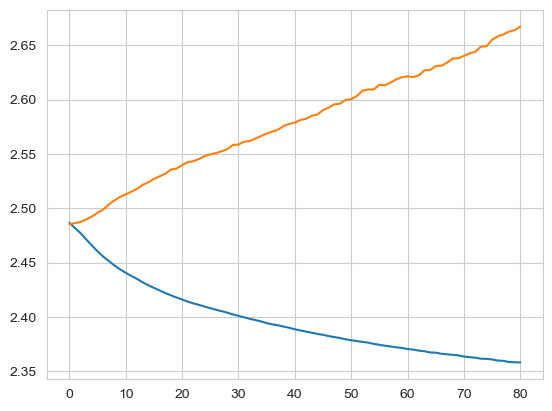

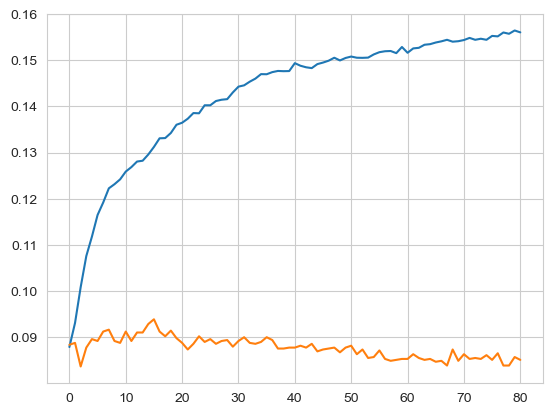

[082/100] Train Acc: 0.156704 Loss: 2.356920 | Val Acc: 0.085294 loss: 2.671963
[083/100] Train Acc: 0.155400 Loss: 2.356705 | Val Acc: 0.087339 loss: 2.674505
[084/100] Train Acc: 0.155681 Loss: 2.356039 | Val Acc: 0.087134 loss: 2.675755
[085/100] Train Acc: 0.156602 Loss: 2.355372 | Val Acc: 0.086725 loss: 2.670519
[086/100] Train Acc: 0.156602 Loss: 2.355170 | Val Acc: 0.085294 loss: 2.680285
[087/100] Train Acc: 0.156960 Loss: 2.354470 | Val Acc: 0.085498 loss: 2.675636
[088/100] Train Acc: 0.156141 Loss: 2.354326 | Val Acc: 0.086930 loss: 2.682103
[089/100] Train Acc: 0.156857 Loss: 2.353521 | Val Acc: 0.086725 loss: 2.683628
[090/100] Train Acc: 0.157854 Loss: 2.352565 | Val Acc: 0.086930 loss: 2.688340
[091/100] Train Acc: 0.158212 Loss: 2.352078 | Val Acc: 0.087134 loss: 2.689598


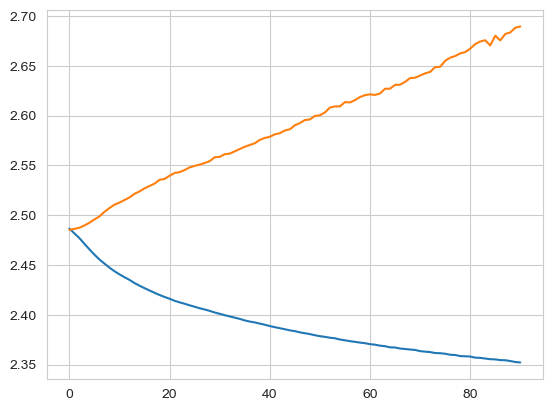

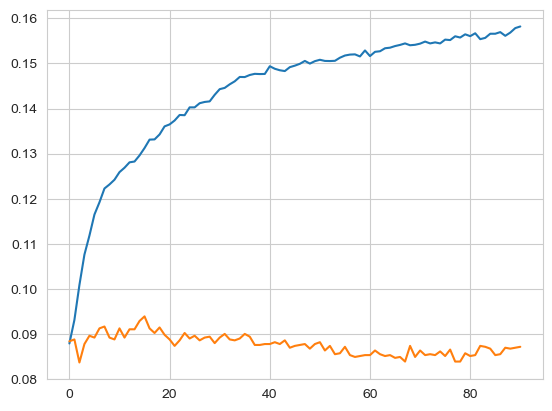

[092/100] Train Acc: 0.157087 Loss: 2.352188 | Val Acc: 0.087339 loss: 2.696058
[093/100] Train Acc: 0.157113 Loss: 2.352002 | Val Acc: 0.087543 loss: 2.693489
[094/100] Train Acc: 0.157062 Loss: 2.350869 | Val Acc: 0.087543 loss: 2.694142
[095/100] Train Acc: 0.157675 Loss: 2.350602 | Val Acc: 0.086930 loss: 2.703290
[096/100] Train Acc: 0.157548 Loss: 2.350246 | Val Acc: 0.088771 loss: 2.698223
[097/100] Train Acc: 0.158110 Loss: 2.349964 | Val Acc: 0.087543 loss: 2.701996
[098/100] Train Acc: 0.157982 Loss: 2.348751 | Val Acc: 0.087339 loss: 2.706235
[099/100] Train Acc: 0.159082 Loss: 2.349082 | Val Acc: 0.089180 loss: 2.710095
[100/100] Train Acc: 0.158519 Loss: 2.348630 | Val Acc: 0.090202 loss: 2.710529
0.08202086316220086


In [13]:
for essay in range(0, 1):
    with open(rf"../embeddings/transformer/transformer_essay{essay}.pickle", "rb") as input_file:
        e = cPickle.load(input_file)

    x_df = e


    total = y.shape[0]
    VAL_RATIO = 0.1
    TEST_RATIO = 0.1
    train_set_size = int(total * (1 - VAL_RATIO - TEST_RATIO))
    valid_set_size = int(total * VAL_RATIO)
    test_set_size = total - train_set_size - valid_set_size
    tensor_S = torch.from_numpy(np.array(x_df)).to(device).float()
    tensor_y = torch.from_numpy(np.array(y)).to(device).long()
    dataset_test = EssayDataset(tensor_S[0:test_set_size], tensor_y[0:test_set_size])
    dataset_val = EssayDataset(tensor_S[test_set_size:test_set_size + valid_set_size],
                               tensor_y[test_set_size:test_set_size + valid_set_size])
    dataset = EssayDataset(tensor_S[test_set_size + valid_set_size::],
                           tensor_y[test_set_size + valid_set_size::])

    BATCH_SIZE = config['batch_size']

    train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, num_workers=0)
    val_loader = DataLoader(dataset_val, batch_size=BATCH_SIZE, num_workers=0)
    test_loader = DataLoader(dataset_test, batch_size=BATCH_SIZE, num_workers=0)
    train_samples = len(train_loader.dataset)
    val_samples = len(val_loader.dataset)
    test_samples = len(test_loader.dataset)
    total = train_samples + val_samples + test_samples
    total_samples = train_samples
    print(f'total: {total}, train: {train_samples}, val: {val_samples}, test: {test_samples}')
    # print_proportions(train_loader,val_loader, test_loader)
    n_iterations = math.ceil(total_samples / BATCH_SIZE)


    # fix random seed for reproducibility
    same_seeds(2022)

    # training parameters
    num_epoch = config['n_epochs']
    # num_inputs, num_channels, kernel_sizes, dilation_sizes, dropouts, window_size
    from baseline_nn_model import MLP

    model = MLP(len(encoding))
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])
    list(model.parameters())

    best_acc = 0.0
    train_accs = []
    val_accs = []
    train_losses = []
    val_losses = []

    for epoch in range(num_epoch):
        train_acc = 0.0
        train_loss = 0.0
        val_acc = 0.0
        val_loss = 0.0

        # training
        model.train()  # set the model to training mode
        for i, data in enumerate(train_loader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs.float())
            batch_loss = criterion(outputs, labels)

            _, train_pred = torch.max(outputs, 1)  # get the index of the class with the highest probability
            batch_loss.backward()
            optimizer.step()

            train_acc += (train_pred.cpu() == labels.cpu()).sum().item()
            train_loss += batch_loss.item()


        # validation
        if val_samples > 0:
            model.eval()  # set the model to evaluation mode
            with torch.no_grad():
                for i, data in enumerate(val_loader):
                    inputs, labels = data
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs.float())
                    batch_loss = criterion(outputs, labels)
                    _, val_pred = torch.max(outputs, 1)

                    val_acc += (
                            val_pred.cpu() == labels.cpu()).sum().item()  # get the index of the class with the highest probability
                    val_loss += batch_loss.item()

                print('[{:03d}/{:03d}] Train Acc: {:3.6f} Loss: {:3.6f} | Val Acc: {:3.6f} loss: {:3.6f}'.format(
                    epoch + 1, num_epoch, train_acc / train_samples, train_loss / len(train_loader),
                    val_acc / val_samples, val_loss / len(val_loader)
                ))

                train_accs.append(train_acc / train_samples)
                val_accs.append(val_acc / val_samples)
                train_losses.append(train_loss / len(train_loader))
                val_losses.append(val_loss / len(val_loader))

                if val_acc > best_acc:
                    best_acc = val_acc
                    torch.save(model.state_dict(), model_path)
                    print('saving model with acc {:.3f}'.format(best_acc / val_samples))
        else:
            print('[{:03d}/{:03d}] Train Acc: {:3.6f} Loss: {:3.6f}'.format(
                epoch + 1, num_epoch, train_acc / train_samples, train_loss / len(train_loader)
            ))

        if epoch % 10 == 0:
            plt.plot(train_losses)
            plt.plot(val_losses)
            plt.show()

            plt.plot(train_accs)
            plt.plot(val_accs)
            plt.savefig(f'../plots/baseline_{essay}.png')
            plt.show()

    # if not validating, save the last epoch
    if valid_set_size == 0:
        torch.save(model.state_dict(), model_path)
        print('saving model at last epoch')

    pt = torch.load(model_path, map_location=device)
    model.load_state_dict(pt)

    test_acc = 0
    test_loss = 0
    model.eval()
    y_pred = []
    y_test = []
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs.float())
            batch_loss = criterion(outputs, labels)
            _, test_pred = torch.max(outputs, 1)
            y_pred += test_pred.tolist()
            y_test += labels.tolist()
            test_acc += (
                    test_pred.cpu() == labels.cpu()).sum().item()  # get the index of the class with the highest probability
            test_loss += batch_loss.item()

        print(test_acc / test_samples)
    # with open(csv_path, "a") as f:
    #     f.write(
    #         f'{t},{channels},{train_acc / train_samples},{val_acc / val_samples},{test_acc / test_samples},{total}\n')



In [20]:
list(set(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

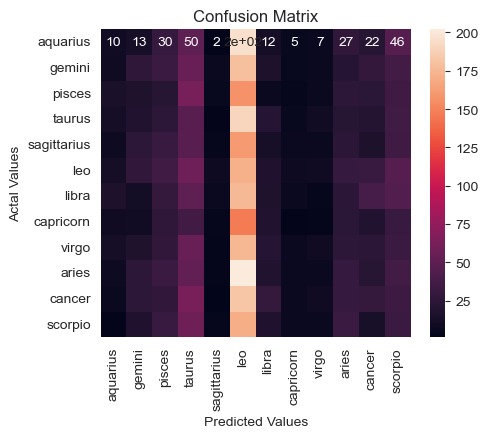

In [22]:
# Sample dictionary

# Reverse key-value pairs
reversed_labels = {count: label for label, count in encoding.items()}

def reverse_label(x):
    return reversed_labels[x]
#Plotting the confusion matrix
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
y_pred2 = list(map(reverse_label, y_pred))
y_test2 = list(map(reverse_label, y_test))
from sklearn.metrics import confusion_matrix, classification_report
cm2 = confusion_matrix(y_test2, y_pred2, labels=list(set(encoding)))
import matplotlib.pyplot as plt
import seaborn as sns

cm_df2 = pd.DataFrame(cm2,
                      index =list(set(encoding)),
                      columns = list(set(encoding)))
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()